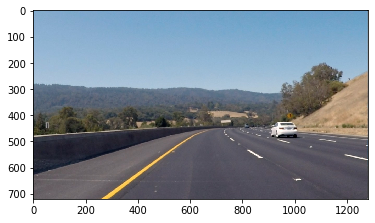

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

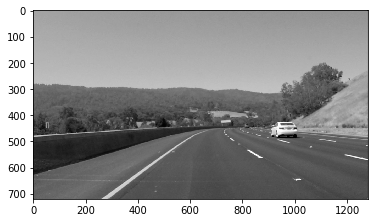

In [2]:
 #Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)#convert the colored channel images in to gray scale

plt.imshow(gray, cmap='gray')

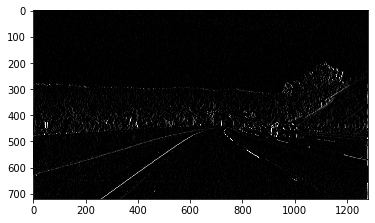

In [4]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2],     #appl sobel x filter to find detection of vertically 
                   [ -1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -12, sobel_x)
plt.imshow(filtered_image, cmap='gray')

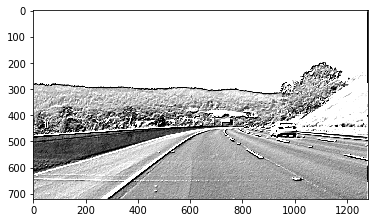

In [5]:
# 5x5 array for edge detection
sobel_y = np.array([[ -1, -2, -1,0,-3], 
                      [ 0, 0, 0,0,1], 
                      [ 1, 2, 1,0,0],
                      [-3,-1,0,-1,3],
                      [-1,0,1,4,2]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

In [6]:
# import required libraries for this section
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2              

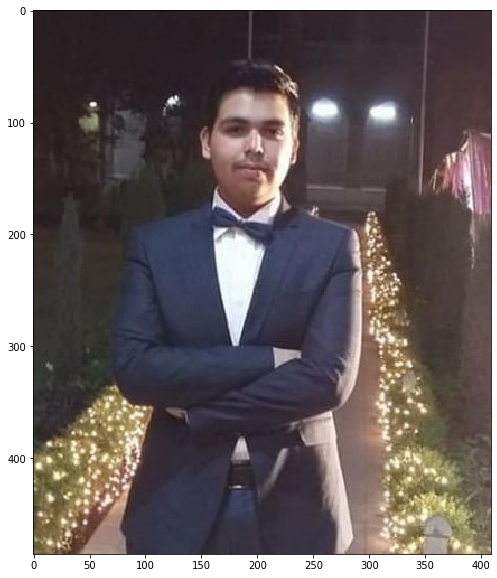

In [7]:
# load in color image for face detection
image = cv2.imread('images/m.jfif')

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert the brg chanel in to rgb

plt.figure(figsize=(10,10)) #the height and weight is 10by10
plt.imshow(image)

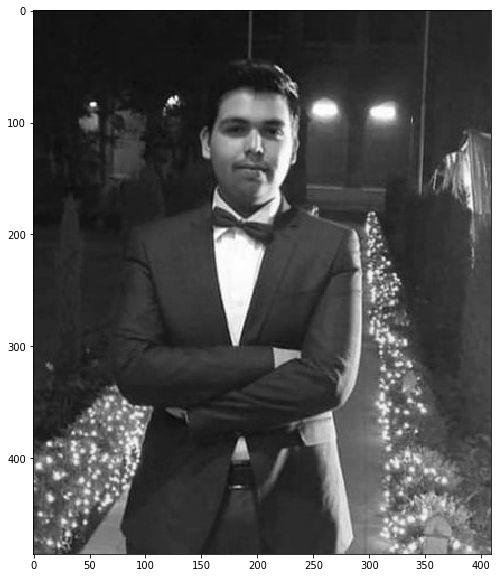

In [8]:
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert the color channel in to gray scle to find the PCA value correctly

plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray')#map the image in to gray

In [9]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 4, 6)#detectmultiscale is function to detect the images with the help of PCAs values

In [10]:
# print out the detections found in images
print ('the algorithm has to detect  ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

the algorithm has to detect  1 faces in this image
Their coordinates and lengths/widths are as follows
[[148  71  96  96]]


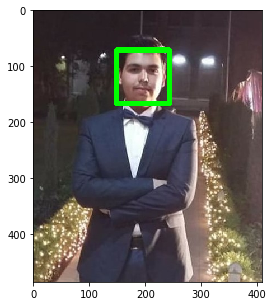

In [11]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle,they show read color 
    # and the final argument (here set to 7) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(0,255,0),7)  

# display the result
plt.figure(figsize=(5,5))# show the size of the image
plt.imshow(img_with_detections)

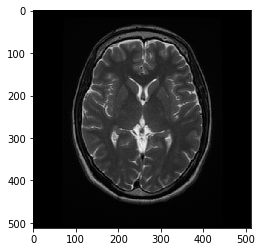

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/brain_MR.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

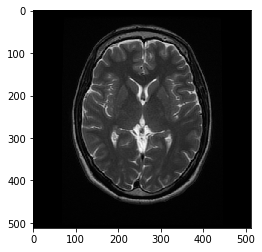

In [13]:
# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

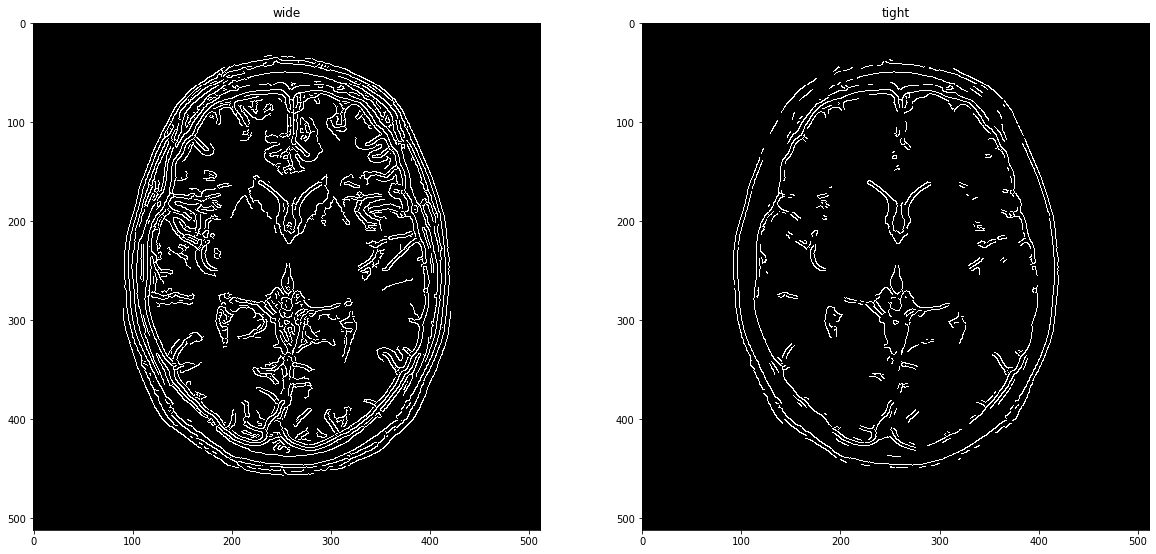

In [14]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
 
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

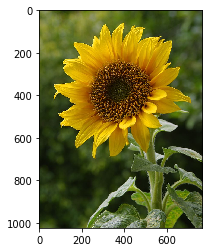

In [15]:
# Read in the image
image = cv2.imread('images/sunflower.jpg')

# Change color to RGB (from BGR)""
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

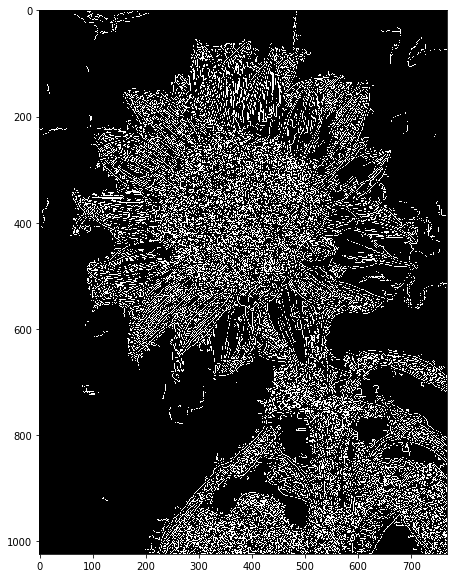

In [16]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define lower and upper thresholds for hysteresis
# right now the threshold is so small and low that it will pick up a lot of noise
lower = 0
upper = 40

edges = cv2.Canny(gray, lower, upper)

plt.figure(figsize=(20,10))
plt.imshow(edges, cmap='gray')

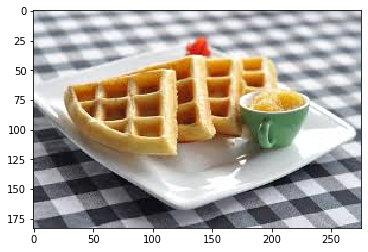

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

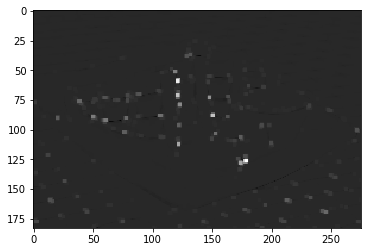

In [20]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')


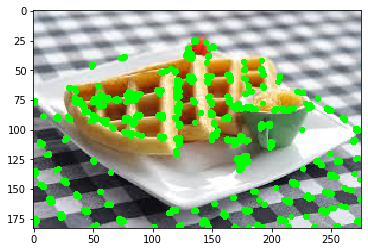

In [21]:
## Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller ans see what happens
#if the transhold is become smaller and smaller they detect more edges
thresh = 0.01*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)